<span style="color: #4F94F0;">Copyright claim</span>
<span style="color: #4F94F0;">Author: Elias De Hondt</span>
<span style="color: #4F94F0;">Website: <a href="https://eliasdh.com">https://eliasdh.com</a></span>
<span style="color: #4F94F0;">All rights reserved.</span>
<br>
<img src="https://eliasdh.com/assets/img/logo-hd.png" alt="Logo" width="100">

# Proefexamen Periode 4

This exam consists of 5 parts.

-   [Samenhang](##Samenhang)
-   [Forecasting](##Forecasting)
-   [Beslissingsbomen](##Beslissingsbomen)
-   [Cluster Analyse](##Cluster_Analyse)
-   [Principale-Componenten Analyse PCA](##Principale-Aomponenten_Analyse_PCA)


There are also help functions for each part. You can find these help functions in the GitHub repositories below.
[DS1-Examen-Hulp-Samenhang.py](https://github.com/EliasDeHondt/DataScience1/blob/master/W24P4/DS1-Examen-Hulp-Samenhang.py)
[DS1-Examen-Hulp-Forecasting.py](https://github.com/EliasDeHondt/DataScience1/blob/master/W24P4/DS1-Examen-Hulp-Forecasting.py)
[DS1-Examen-Hulp-Beslissingsbomen.py](https://github.com/EliasDeHondt/DataScience1/blob/master/W24P4/DS1-Examen-Hulp-Beslissingsbomen.py)
[DS1-Examen-Hulp-Cluster_Analyse.py](https://github.com/EliasDeHondt/DataScience1/blob/master/W24P4/DS1-Examen-Hulp-Cluster_Analyse.py)
[DS1-Examen-Hulp-PCA.py](https://github.com/EliasDeHondt/DataScience1/blob/master/W24P4/DS1-Examen-Hulp-PCA.py)

Auxiliary functions from previous period (P3).
[DS1-Examen-Hulp-Diagram.py](https://github.com/EliasDeHondt/DataScience1/blob/master/W18P3/DS1-Examen-Hulp-Diagram.py)
[DS1-Examen-Hulp-Frequenties.py](https://github.com/EliasDeHondt/DataScience1/blob/master/W18P3/DS1-Examen-Hulp-Frequenties.py)
[DS1-Examen-Hulp-Spreidingsmaten-en-Centrum.py](https://github.com/EliasDeHondt/DataScience1/blob/master/W18P3/DS1-Examen-Hulp-Spreidingsmaten-en-Centrum.py)

You can find all the datasets that we are going to use on canvas, but also in the following GitHub folder.
[Datasets](https://github.com/EliasDeHondt/DataScience1/blob/master/W24P4/data)

And for everyone who's using GitHub Copilot, I suggest you disable it because it's not available during the final exam because you do need an internet connection to use it.
You can turn it off with the following shortcut: `Ctrl + Alt + Shift + O` or `Ctrl + Shift + P` and then type `GitHub Copilot: Disable` and press enter.

In [2]:
# Imports
import pandas as pd
import numpy as np
from IPython import InteractiveShell
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
# These are helper functions that can be found on canvas or also in the GitHub repository.
from W20P4.forecast import find_period, plot_seasonal_decompositon, create_trend_model, predict, forecast_errors, GeneralRegression, linear_combination
import graphviz
from id3 import Id3Estimator, export_graphviz
from matplotlib import pyplot as plt
import matplotlib
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from pca import pca

# The function below comes from an utilities file, but it was partly statically programmed and has been modified here to make it visually clearer what is happening.
def plot_trends(y1: np.array, y2=None, sub_title=None, label1='gegeven', label2='voorspeld', color='C0', ax=None):
    if y2 is not None:
        n = max(y1.size, y2.size)
    else:
        n = y1.size

    if not ax:
        fig, ax = plt.subplots(figsize=(25, 5))
    else:
        fig = ax.figure

    if sub_title:
        fig.suptitle(sub_title, y=1.02)

    ax.set_xlabel('Maanden')
    ax.set_ylabel('Aantal bezoekers')
    ax2 = ax.secondary_xaxis('top')
    ax2.set_xticks(range(n))
    ax2.set_xticklabels(['{}'.format(j % 12 + 1) for j in range(n)])

    ax.set_xticks(range(n))
    ax.plot(y1, label=label1, color=color, marker='o')
    if y2 is not None:
        ax.plot(y2, label=label2, color='C1', marker='^')
    for i in range(0, n, 4):
        ax.axvline(i, color='gray', linewidth=0.5)

    ax.legend()

## Samenhang
Dataset We are going to use equals `batterijen.csv` and contains the following columns: `geproduceerd`, `aantalDefect`.
Total questions: 12

Question 1: Read in the data. Put this data in variable `batterijen`.

In [3]:
batterijen = pd.read_csv('data/batterijen.csv', sep=',')
display(batterijen.head())

,geproduceerd,aantalDefect
0,1489,21
1,2162,34
2,2472,47
3,3116,77
4,4724,227


Question 2: There are outliers in the Defect count column. Remove these. And reset the index.

In [4]:
Q1 = batterijen.aantalDefect.quantile(0.25)
Q3 = batterijen.aantalDefect.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - IQR * 1.5
upper_bound = Q3 + IQR * 1.5

batterijen = batterijen[(batterijen['aantalDefect'] >= lower_bound)  & (batterijen['aantalDefect'] <= upper_bound)]

batterijen.reset_index(drop=True, inplace=True)

display(batterijen.head())

,geproduceerd,aantalDefect
0,1489,21
1,2162,34
2,2472,47
3,3116,77
4,1367,12


Question 3: Create a scatterplot of the two columns. Is there a linear relationship?

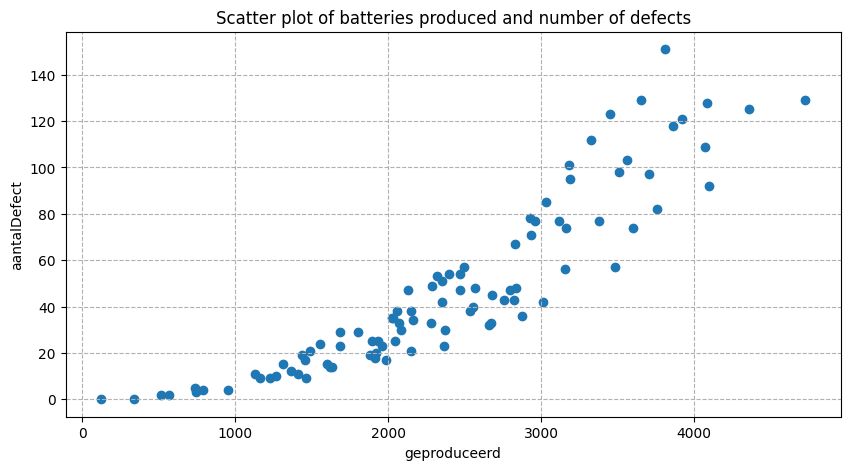

In [5]:
fig, ax=plt.subplots(figsize=(10,5))
ax.scatter(batterijen.geproduceerd, batterijen.aantalDefect)
ax.set_title('Scatter plot of batteries produced and number of defects')
ax.set_xlabel('geproduceerd')
ax.set_ylabel('aantalDefect')
_=ax.grid(linestyle='--')

# Yes, there is a linear relationship between geproduceerd and aantalDefect because the points are close to a straight line.

Question 4: What correlation do you find with Kendall's method?

In [6]:
InteractiveShell.ast_node_interactivity = 'all'
display(batterijen.corr(method='kendall'))

# The correlation is 0.95 which is a strong positive correlation.

,geproduceerd,aantalDefect
geproduceerd,1.000000,0.816143
aantalDefect,0.816143,1.000000


Question 5: Actually, we are not interested in the absolute number of defective batteries, but we are interested in its
percentage. So divide the number of defects by the number of batteries produced. What is it
average percentage of defective batteries? Put this in a data frame and print it out.

In [7]:
batterijen['percentageDefect'] = batterijen['aantalDefect'] / batterijen['geproduceerd'] * 100
gemiddeldPercentage = batterijen['percentageDefect'].mean()
display(batterijen)
print("Average percentage of defective batteries", round(gemiddeldPercentage, 2))

,geproduceerd,aantalDefect,percentageDefect
0,1489,21,1.410343
1,2162,34,1.572618
2,2472,47,1.901294
3,3116,77,2.471117
4,1367,12,0.877835
...,...,...,...
89,1959,23,1.174068
90,1464,9,0.614754
91,2368,23,0.971284
92,2873,36,1.253046


Average percentage of defective batteries 1.71


Question 6: Make a scatter plot again with the percentage of defective batteries. Do you see the difference with the previous chart?

Text(0.5, 1.0, 'Scatter plot of batteries produced and percentage of defects')

Text(0.5, 0, 'geproduceerd')

Text(0, 0.5, 'percentageDefect')

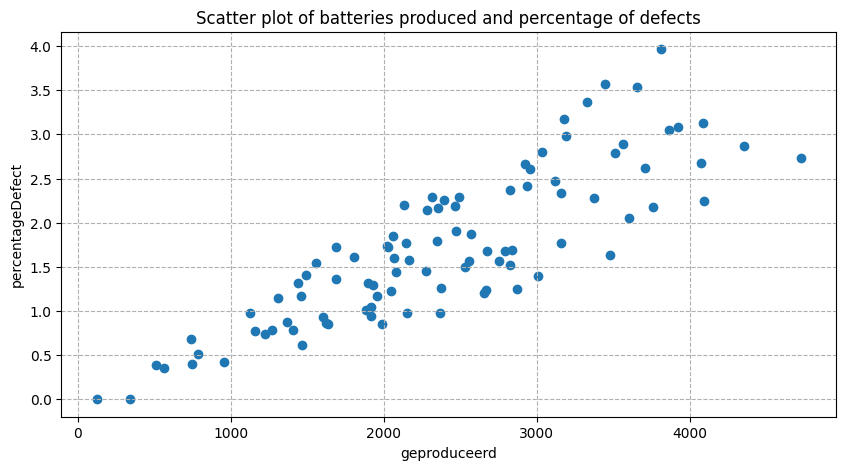

In [8]:
fig, ax=plt.subplots(figsize=(10,5))
ax.scatter(batterijen.geproduceerd, batterijen.percentageDefect)
ax.set_title('Scatter plot of batteries produced and percentage of defects')
ax.set_xlabel('geproduceerd')
ax.set_ylabel('percentageDefect')
_=ax.grid(linestyle='--')

# Yes, de points are more spread out.

Question 7: Now calculate the correlation between the number of batteries produced and the percentage of defective ones
batteries.

In [9]:
correlatie = batterijen['geproduceerd'].corr(batterijen['percentageDefect'])
print("Correlatie tussen aantal geproduceerde batterijen en percentage defecte batterijen:", round(correlatie, 2))

Correlatie tussen aantal geproduceerde batterijen en percentage defecte batterijen: 0.85


Question 8: What is the value of R²? What does this mean?

In [10]:
model = LinearRegression()
X = batterijen[['percentageDefect']]
y = batterijen.geproduceerd

model.fit(X,y)
y_hat = model.predict(X)

R = r2_score(y, y_hat)
print("R² =", round(R, 2))

# R² is 0.72 which means that 72% of the variation in the number of batteries produced can be explained by the percentage of defective batteries.

# (Additional) In other words, 72% of the fluctuations in the number of batteries can be attributed to changes in the percentage of defective batteries. This suggests a strong relationship between the two variables and implies that the percentage of defective batteries is a good predictor of the number of batteries produced.

LinearRegression()

R² = 0.72


Question 9: Draw the regression line on the scatter plot. What are the slope and intercept values?

LinearRegression()

Slope: 0.000745759483036815
Intercept: -0.05713301754655231


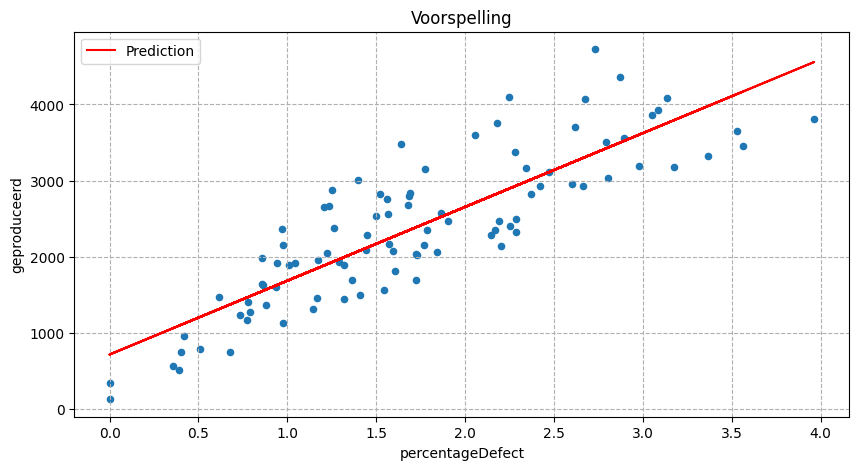

In [11]:
model = LinearRegression()
X = batterijen[['percentageDefect']]
y = batterijen.geproduceerd

model.fit(X, y)
y_hat = model.predict(X)

ax = batterijen.plot(kind='scatter', x='percentageDefect', y='geproduceerd', figsize=(10,5), title='Voorspelling' ,marker='o')
ax.plot(batterijen.percentageDefect, y_hat, color='r', label='Prediction')
ax.grid(linestyle='--')
_=ax.legend()

slope, intercept, r_value, p_value, std_err = linregress(batterijen['geproduceerd'], batterijen['percentageDefect'])
print("Slope:", slope)
print("Intercept:", intercept)

Question 10: What is the standard error of estimation? What does this mean?

In [12]:
model = LinearRegression()
X = batterijen[['percentageDefect']]
y = batterijen.geproduceerd

model.fit(X, y)
y_hat = model.predict(X)

standard_error_of_estimation = mean_squared_error(y, y_hat,squared=False)
print("standard error of estimation: ", standard_error_of_estimation)

# 511.05144098110145, indicates the average deviation (or error) between the observed values and the predicted values obtained from the linear regression model. In this case, it suggests that, on average, the predicted values of the dependent variable (batterijen.geproduceerd) are approximately 511.05144098110145 units away from the actual values.

LinearRegression()

standard error of estimation:  511.05144098110145


Question 11: If production were to be increased to 8,000 batteries/day. How many defective batteries would you
then expect?

In [13]:
slope, intercept, r_value, p_value, std_err = linregress(batterijen['geproduceerd'], batterijen['percentageDefect'])
print("Slope:", slope)
print("Intercept:", intercept)

defect = slope * 8000 - intercept

print("Defect:", defect)

# 6.0232088818410725 defective batteries would be expected.

Slope: 0.000745759483036815
Intercept: -0.05713301754655231
Defect: 6.0232088818410725


Question 12: How many batteries can the factory produce per day so that at most 1 percent is defective?

In [14]:
maxProd = (0.01 - intercept) / slope
print("Maximum production capacity with a maximum of 1% defect: ", maxProd)

Maximum production capacity with a maximum of 1% defect:  90.01966327424928


## Forecasting
Dataset We are going to use equals `pretpark.csv` and contains the following columns: `jaar`, `maand`, `aantal_bezoekers`.
Total questions: 11

Question 1: Read in the data. Put this data in variable `pretpark`.

In [15]:
pretpark = pd.read_csv('data/pretpark.csv', sep=';')
display(pretpark.head())

,jaar,maand,aantal_bezoekers
0,1,1,120
1,1,2,89
2,1,3,492
3,1,4,586
4,1,5,1300


Question 2: Make sure that the column `aantal_bezoekers` becomes a float.

In [16]:
pretpark['aantal_bezoekers'] = pretpark['aantal_bezoekers'].astype(float)

Question 3: Make a graph of the data. What do you notice visually? Is the number of visitors increasing or decreasing? Is there a recognizable pattern?

Text(0, 0.5, 'Observatie')

Text(0.5, 1.0, 'Multiplicative')

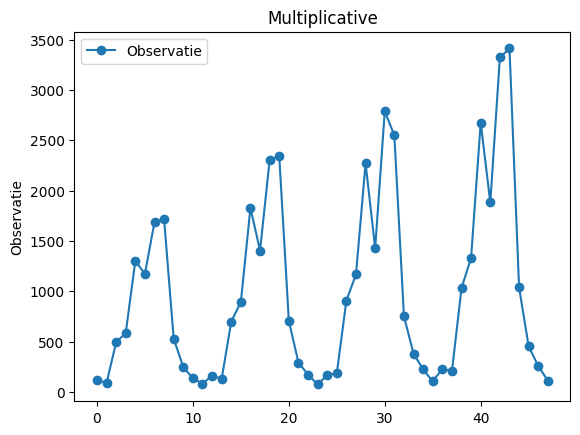

In [17]:
aantal_bezoekers = pretpark['aantal_bezoekers']
sd_model = seasonal_decompose(aantal_bezoekers, model='multiplicative', period=4)
fig, axes = plt.subplots(nrows=1, ncols=1)

axes.plot(sd_model.observed, 'o-', label='Observatie')
axes.set_ylabel('Observatie')
axes.set_title('Multiplicative')
axes.legend()
plt.show()

# The number of visitors is increasing. There is a recognizable pattern, the number of visitors increases in the summer and decreases in the winter.

Question 4: Would you use the additive or multiplicative model?

In [18]:
aantal_bezoekers = pretpark['aantal_bezoekers']
sd_model = seasonal_decompose(aantal_bezoekers, model='multiplicative', period=4)
seasonal_std = np.std(sd_model.seasonal)
residual_std = np.std(sd_model.resid)
std_ratio = seasonal_std / residual_std

if std_ratio > 1:
    print("Multiplicative model")
else:
    print("Additive model")

Additive model


Question 5: What is the size of 1 “season”?

Season size: [1]


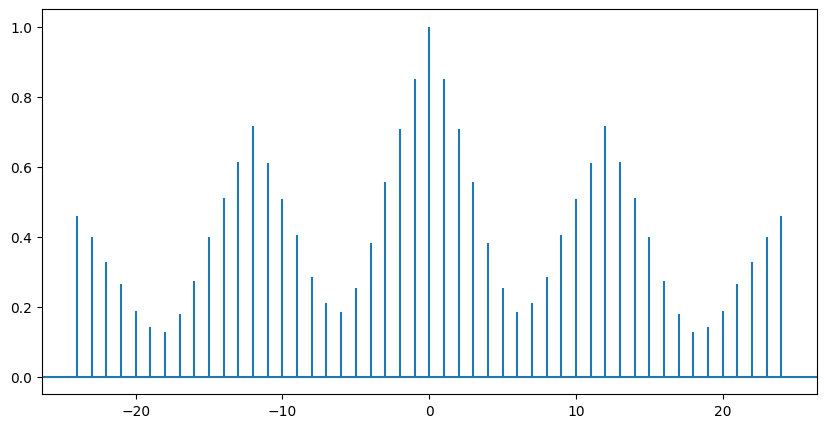

In [19]:
aantal_bezoekers = pretpark['aantal_bezoekers']

seizoenGrootte = find_period(aantal_bezoekers, maxlags=24, top_n=1)
print("Season size:", seizoenGrootte)

fig, ax = plt.subplots(figsize=(10, 5))
lags, acfs, _, _ = ax.acorr(aantal_bezoekers, maxlags=24)

Question 6: Now do a decomposition. Plot these in a diagram.

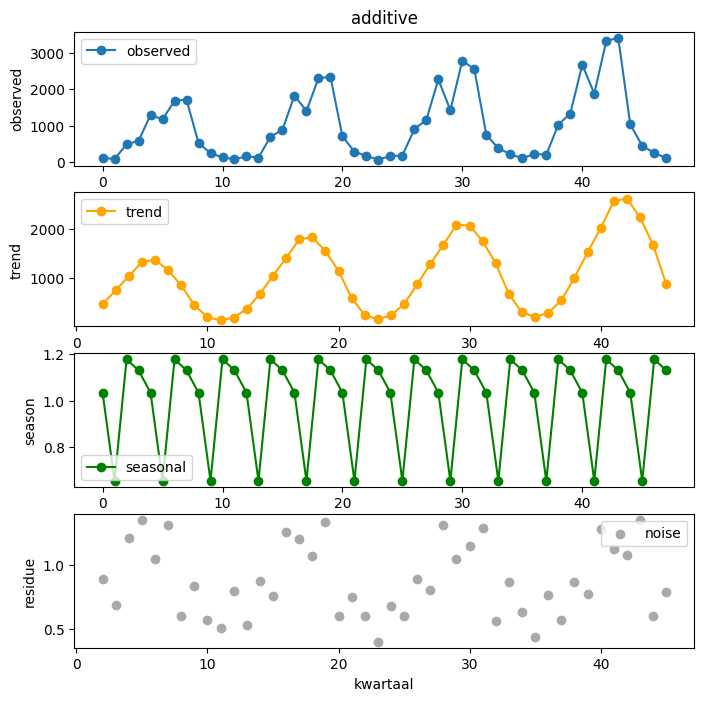

In [20]:
plot_seasonal_decompositon(sd_model, 'additive')
# sd_model.observed
# sd_model.trend
# sd_model.seasonal
# sd_model.resid

Question 7: We are now going to make a model to make predictions for the future. Do a linear regression on the trend and determine the slope and the intercept.

In [21]:
aantal_bezoekers = pretpark['aantal_bezoekers']

sd_model = seasonal_decompose(aantal_bezoekers, model='additive', period=4)
data = sd_model.trend.dropna()

X = data.index.to_numpy()
y = data.to_numpy()

reg_model = GeneralRegression()
reg_model.fit(X, y)

print("Slope: ", reg_model.coef_)
print("Intercept: ", reg_model.intercept_)

Slope:  [ 0.         20.32499119]
Intercept:  591.9621388301621


Question 8: Calculate the values of the trend for the upcoming year.

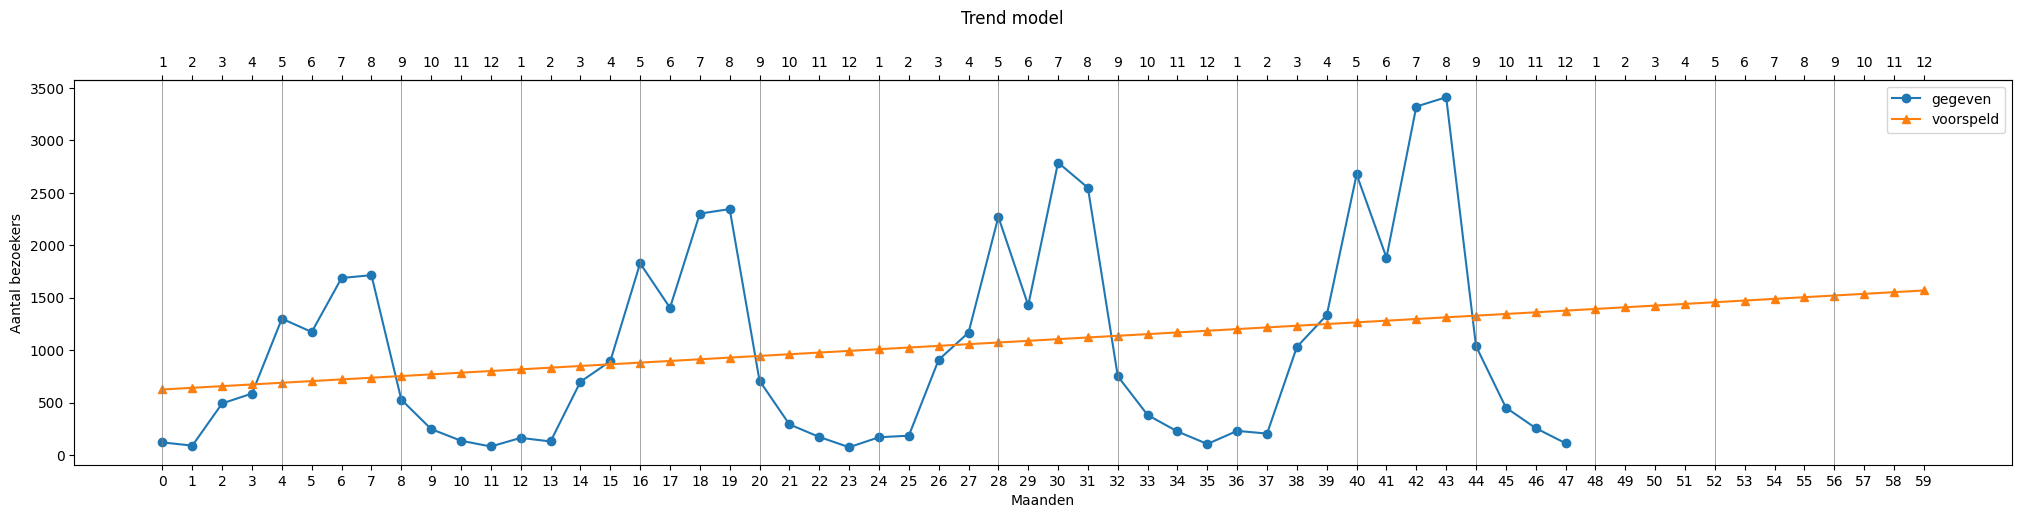

In [22]:
aantal_bezoekers = pretpark['aantal_bezoekers']

predict_trend = create_trend_model(aantal_bezoekers)

plot_trends(aantal_bezoekers, predict_trend(np.arange(60)), 'Trend model')

trend_waarden = predict_trend(np.arange(60))

Question 9: What are the values of the season?

In [23]:
aantal_bezoekers = pretpark['aantal_bezoekers']

seizoen_waarden = predict(aantal_bezoekers, 0, 60, linear_combination, 12)

display(seizoen_waarden)

array([          nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
        249.14980917,  166.98290088,  955.59329228, 1377.93809354,
       2600.80543191, 1638.42333591, 3145.27471972, 3195.70472754,
        981.73423029,  313.98132973,  222.0633528 ,   61.65803959,
        191.46274962,  251.27938815, 1175.65166835, 1536.6350276 ,
       2824.01641131, 1402.77786963, 3322.29664825, 2749.28806139,
        823.18203143,  465.40214046,  298.25125915,  128.37491396,
        326.01728862,  239.90069636, 1168.95858701, 1510.3499479 ,
       3119.18605948, 2450.76136334, 3982.61736385, 4507.76557534,
       1474.71336181,  511.88794877,  289.40219413,  100.31614

Question 10: Now multiply the trend values by the pattern. You now have an estimate of the number of visitors for the following year. What values do you come up with (round the values to an integer)?

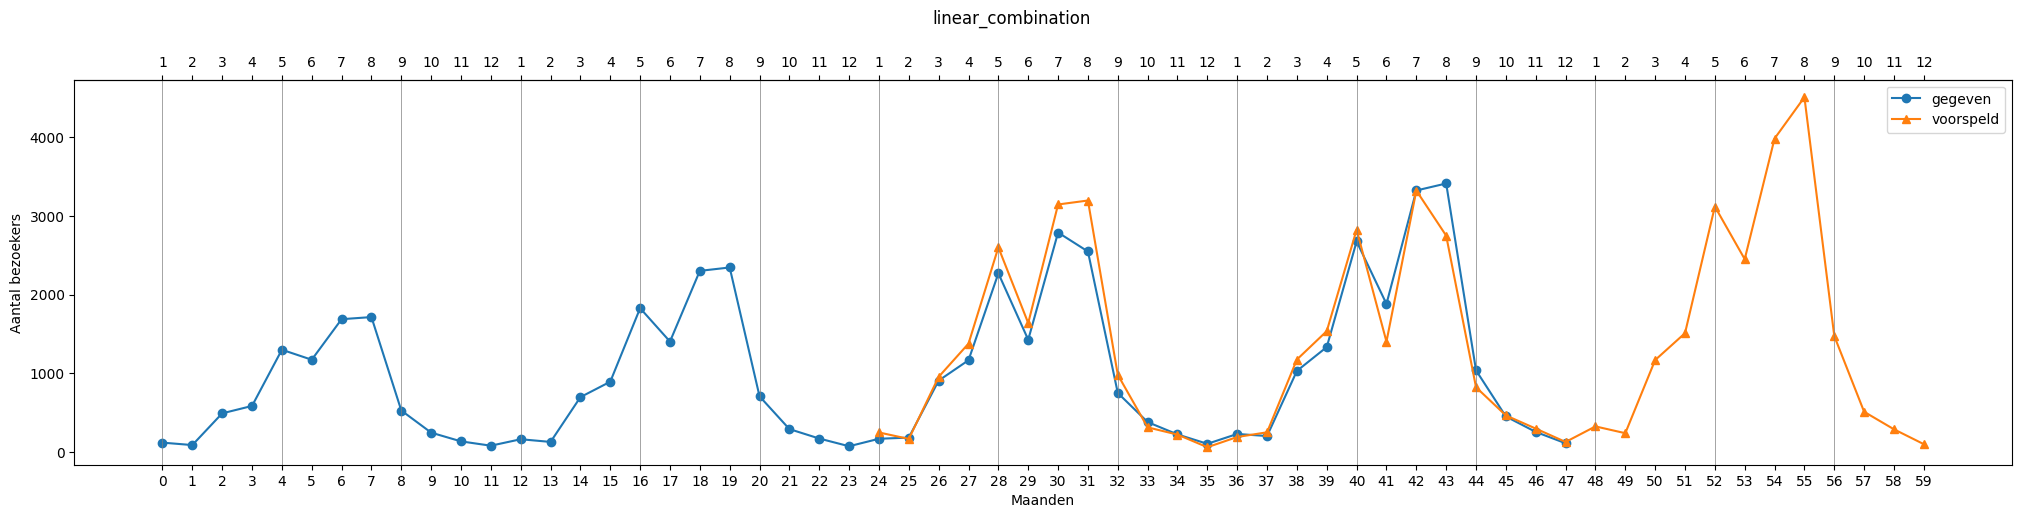

In [24]:
plot_trends(aantal_bezoekers, seizoen_waarden, 'linear_combination')

Question 11: What is the MAE, RMSE and the MAPE? What does the MAPE mean?

In [26]:
display(forecast_errors(aantal_bezoekers, predict_trend(np.arange(48)), 'Trend model'))

,MAE,RMSE,MAPE
Trend model,762.289551,908.57489,2.473935


## Beslissingsbomen
Dataset We are going to use equals `playBall.csv` and contains the following columns: `Outlook`, `Temperature`, `Humidity`, `Wind`, `Play`.
Total questions: 6

Question 1: Read in the data. Put this data in variable `playBall`.

In [ ]:
playBall = pd.read_csv('data/playBall.csv', sep=',')
display(playBall.head())

Question 2: Calculate the entropy of this table. Also write down the formula.

In [ ]:
def entropy(series: pd.Series):
    vc = series.value_counts(normalize=True, sort=False)
    return -(vc * np.log2(vc)).sum()

E_ouder = entropy(playBall.Play)
print('Entropy, E(S) =', E_ouder)
print("\n")
E_ouder = playBall.apply(entropy)
print(E_ouder)

# E(S) = -((9/14) * log2(9/14) + (5/14) * log2(5/14)) = 0.940

Question 3: Calculate the gain for each column.

In [ ]:
def information_gain(parent_table: pd.DataFrame, attribute: str, target: str):
    entropy_parent = entropy(parent_table[target])
    child_entropies = []
    child_weights = []
    for (label, fraction) in parent_table[attribute].value_counts().items():
        child_df = parent_table[parent_table[attribute] == label]
        child_entropies.append(entropy(child_df[target]))
        child_weights.append(int(fraction))
    return entropy_parent - np.average(child_entropies, weights=child_weights)

IG_Outlook = information_gain(playBall, 'Outlook', 'Play')
IG_Temperature= information_gain(playBall, 'Temperature', 'Play')
IG_Humidity = information_gain(playBall, 'Humidity', 'Play')
IG_Wind = information_gain(playBall, 'Wind', 'Play')

print("Initiële Information Gain voor alle kolommen")
print("Outlook: ", IG_Outlook)
print("Temperature: ", IG_Temperature)
print("Humidity: ", IG_Humidity)
print("Wind: ", IG_Wind)

Question 4: Which column do you choose for the first node?

In [ ]:
# Outlook has the highest Information Gain, so we choose that as the first node.

Question 5: Create the tree structure.

In [ ]:
X = playBall.drop(columns=['Play'], axis=1)
y = playBall['Play']

model = Id3Estimator()

model.fit(X, y)

model_tree = export_graphviz(model.tree_, feature_names=X.columns)
graphviz.Source(model_tree.dot_tree)

Question 6: Make a prediction now? Will games be played in the following weather conditions?
 * Outlook = Sunny
 * Temperature = Mild
 * Humidity = High
 * Wind = Weak

In [ ]:
voorspelling = np.array([['Sunny', 'Mild', 'High', 'Weak']])
print(model.predict(voorspelling))

## Cluster_Analyse
Dataset We are going to use equals `simpsons.csv` and contains the following columns: `naam`, `haarlengte`, `gewicht`, `leeftijd`, `geslacht`.
Total questions: 12

Question 1: Read in the data. Put this data in variable `simpsons`.

In [ ]:
simpsons = pd.read_csv('data/simpsons.csv', sep=',')
display(simpsons) # .head() is not necessary, because there are only 9 rows.

Question 2: Delete the `naam` and `geslacht` columns as they are nominal. And use the names as index.

In [ ]:
simpsons.index = simpsons.naam
simpsons = simpsons.drop(['naam', 'geslacht'], axis=1)
display(simpsons)

Question 3: Determine the Euclidean distances between the Simpsons.

In [ ]:
euclidische_afstanden = pd.DataFrame(cdist(simpsons, simpsons), columns=simpsons.index, index=simpsons.index)

display(euclidische_afstanden)

Question 4: Which Simpsons Are Closest to Each Other?

In [ ]:
nonzero_distances = euclidische_afstanden.mask(euclidische_afstanden <= 0, np.inf)

min_indices = np.unravel_index(np.argsort(nonzero_distances.values, axis=None), nonzero_distances.values.shape)

min_distance = nonzero_distances.iloc[min_indices[0][0], min_indices[1][0]]
personage1 = nonzero_distances.index[min_indices[0][0]]
personage2 = nonzero_distances.columns[min_indices[1][0]]

print(f"The Simpsons characters '{personage1}' and '{personage2}' are closest to each other with a distance of {min_distance}.")

Question 5: What is the Manhattan distance between Homer and Bart?

In [ ]:
afstanden_manhattan = pd.DataFrame(cdist(simpsons, simpsons, metric="cityblock"), columns=simpsons.index, index=simpsons.index) # Afstanden Manhattan

display(afstanden_manhattan)
# Afstand Homer (x) en Bart (y) 188.0

Question 6: What is the standardized Euclidean distance between Marge and Maggie?

In [ ]:
afstanden_gestandaardiseerd = pd.DataFrame(data=cdist(simpsons, simpsons, metric="seuclidean"), columns=simpsons.index.values, index=simpsons.index.values)

gestandaardiseerde_afstand = afstanden_gestandaardiseerd.loc['Marge', 'Maggie']

print(f"The standardized Euclidean distance between Marge and Maggie is: {gestandaardiseerde_afstand}")

Question 7: Now make a dendrogram (using Euclidean distances)

In [ ]:
afstanden_euclidische = pd.DataFrame(cdist(simpsons, simpsons), columns=simpsons.index, index=simpsons.index)

colors = list(matplotlib.colors.cnames.keys())[0:100:2]

fig, ax = plt.subplots(figsize=(12, 5))
distances_single = linkage(afstanden_euclidische, method='single') # Single linkage (kleinste afstand eerst)
_ = ax.set_title('Dendrogram met single linkage')
_ = ax.set_xlabel('punt')
_ = ax.set_ylabel('Euclidische afstand')
_ = ax.grid(linestyle='--', axis='y')

dgram = dendrogram(distances_single, labels=afstanden_euclidische.index.values, link_color_func=lambda x: colors[x], ax=ax)

Question 8: If you had to select 2 clusters from this tree, what would they be? How would you name those clusters?

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2, metric='manhattan', linkage='single') # n_clusters=2 is the number of clusters we want to have.
cluster.fit(simpsons)
simpsons['cluster_with_2'] = cluster.labels_
display(simpsons)

Question 9: Make a scatterplot of the Simpsons with age in the X-axis and weight in the Y-axis. Use the cluster number for the color.

In [ ]:
fig, ax=plt.subplots(figsize=(10,5))
ax.scatter(simpsons.leeftijd, simpsons.gewicht, c=simpsons.cluster_with_2, cmap='rainbow')
ax.set_title('Y vs X')
ax.set_xlabel('X')
ax.set_ylabel('Y')
_=ax.grid(linestyle='--', axis='x')

Question 10: Now determine 3 clusters from the tree and plot again. Which Simpsons are now in which category?

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, metric='manhattan', linkage='single')
cluster.fit(simpsons)
simpsons['cluster_with_3'] = cluster.labels_
display(simpsons)

In [ ]:
fig, ax=plt.subplots(figsize=(10,5))
ax.scatter(simpsons.leeftijd, simpsons.gewicht, c=simpsons.cluster_with_3, cmap='rainbow') # "c=simpsons.cluster_with_3, cmap='rainbow'" voor kleuren
ax.set_title('Y vs X')
ax.set_xlabel('X')
ax.set_ylabel('Y')
_=ax.grid(linestyle='--', axis='x')

Question 11: Now try to make 2 clusters with the k-means algorithm.

In [ ]:
model = KMeans(n_clusters=2, n_init='auto', max_iter=100)
model.fit(simpsons)
model_simpsons_KMeans = pd.DataFrame(zip(simpsons.leeftijd, simpsons.gewicht, model.labels_), columns=["x", "y", "cluster"])
display(model_simpsons_KMeans)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(simpsons.gewicht, simpsons.leeftijd, c=model.labels_)
ax.scatter(model.cluster_centers_[:, 1], model.cluster_centers_[:, 2], c='black', s=100)
ax.set_xlabel("gewicht")
ax.set_ylabel("leeftijd")
ax.grid(linestyle='--')

Question 12: Can you draw up a decision tree that determines which cluster a Simpson falls into?
To do this, create a column that contains the cluster number and use DecisionTreeClassifier to construct the tree.

In [ ]:
model = KMeans(n_clusters=2, n_init='auto', max_iter=100)
model.fit(simpsons)

classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(simpsons.drop(['cluster_with_3', 'cluster_with_2'], axis=1), model.labels_)

_ = tree.plot_tree(classifier, feature_names=['haarlengte', 'gewicht', 'leeftijd'], class_names=['cluster {}'.format(i) for i in np.unique(model.labels_)], filled=True)

## Principale-Aomponenten_Analyse_PCA
Dataset We are going to use equals `protein_consumption.csv` and contains the following columns: `Country`, `Comunist`, `Region`, `Red_Meat`, `White_Meat`, `Eggs`, `Milk`, `Fish`, `Cereal`, `Starch`, `Nuts`, `Fruits_Vegetables`, `Total`.
Total questions: 10

Question 1: Read in the data. Put this data in variable `protein_consumption`.

In [ ]:
protein_consumption = pd.read_csv("data/protein_consumption.csv", sep=",", decimal=".")
display(protein_consumption.head())

Question 2: Use the names of the countries listed in the first column as an index.

In [ ]:
protein_consumption.index = protein_consumption['Country']

Question 3: Which columns should you remove in order to perform a Principal Component Analysis?
_Tip: Remove any columns with the wrong measure scale, columns that don't make sense._

In [ ]:
protein_consumption = protein_consumption.drop(columns=['Country', 'Comunist', 'Region', 'Total'])
display(protein_consumption)

Question 4: View the correlations between the variables. (matrix)

In [ ]:
corr = protein_consumption.corr()
display(corr)

Question 5: Perform a Principal Component Analysis. Remember that you need to standardize the data first. It is best to create a pipeline for this with a StandardScaler

In [ ]:
model = make_pipeline(StandardScaler(), PCA())
model.fit(protein_consumption)
X_PCA = model.transform(protein_consumption)

Question 6: Are there one or more variables that play a significant role in determining the first principal component?

In [ ]:
model = pca(normalize=True, n_components=0.90)
out = model.fit_transform(protein_consumption, verbose=False)
display(out['loadings'])
display(out['topfeat'])
display(out['explained_var'])

Question 7: Make a biplot. Which countries belong together?

In [ ]:
y = protein_consumption.index
_ = model.biplot(cmap='viridis', labels=y, density=True, s=20, n_feat=3, fontsize=10, figsize=(10, 7))

Question 8: Create a new data frame where we take the first three main components for the observations.

In [ ]:
nieuwDataframe = out['PC'].iloc[:, 0:3]

display(nieuwDataframe)

Question 9: Apply a hierarchical cluster analysis to this (Euclidean distance). Compare the results with the results obtained with a cluster analysis applied to the original variables.

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
distances = linkage(protein_consumption, method='single')
dgram = dendrogram(distances, labels=protein_consumption.index, leaf_rotation=90, ax=axes)
_ = axes.set_title('Cluster dendrogram')
_ = fig.tight_layout()

Question 10: Finally, compare the biplots.

In [ ]:
model = pca(n_components=3, normalize=True)
_ = model.fit_transform(protein_consumption)
_ = model.biplot(legend=False)

model = pca(normalize=True)
_ = model.fit_transform(protein_consumption)
_ = model.biplot(legend=False)